<a href="https://colab.research.google.com/github/i-am-U-hyUn/data-science/blob/main/03_week_mission_booster_2%EB%B2%88%EC%A7%B8%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df = df.dropna()

## 미션 1) - 수치형 변수를 범주형 변수로 만들기


In [ ]:
# 수치형 컬럼들을 구합니다.
num_col = df.select_dtypes(include="number").columns.tolist()
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

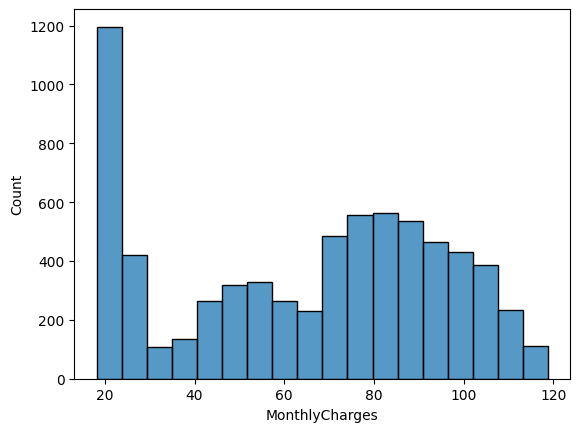

In [ ]:
# 여기에 구간화 전의 수치 변수에 대한 히스토그램과 구간화 이후 범주로 변환해준 변수에 대한 countplot을 시각화 해주세요.
sns.histplot(data=df, x="MonthlyCharges")

In [ ]:
df["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
# min값이 18이고 max가 118인 상황에서 공평하게 숫자를 4등분한 경우
df.loc[df["MonthlyCharges"]<43, "MonthlyCharges_group"] = "18-43"
df.loc[(df["MonthlyCharges"]>=43) & (df["MonthlyCharges"]<68), "MonthlyCharges_group"] = "43-68"
df.loc[(df["MonthlyCharges"]>=68) & (df["MonthlyCharges"]<93), "MonthlyCharges_group"] = "68-93"
df.loc[df["MonthlyCharges"]>=93, "MonthlyCharges_group"] = "93+"

In [ ]:
df[["MonthlyCharges", "MonthlyCharges_group"]]

,MonthlyCharges,MonthlyCharges_group
customerID,,
7590-VHVEG,29.85,18-43
5575-GNVDE,56.95,43-68
3668-QPYBK,53.85,43-68
7795-CFOCW,42.30,18-43
9237-HQITU,70.70,68-93
...,...,...
6840-RESVB,84.80,68-93
2234-XADUH,103.20,93+
4801-JZAZL,29.60,18-43


<Axes: xlabel='MonthlyCharges_group', ylabel='count'>

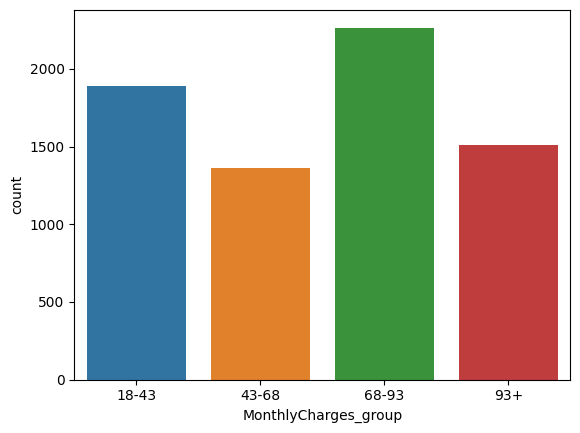

In [ ]:
colors = {"18-43": "blue", "43-68": "orange", "68-93": "green", "93+": "red"}
sns.countplot(data = df, x="MonthlyCharges_group", hue="MonthlyCharges_group")

In [ ]:
df["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Count'>

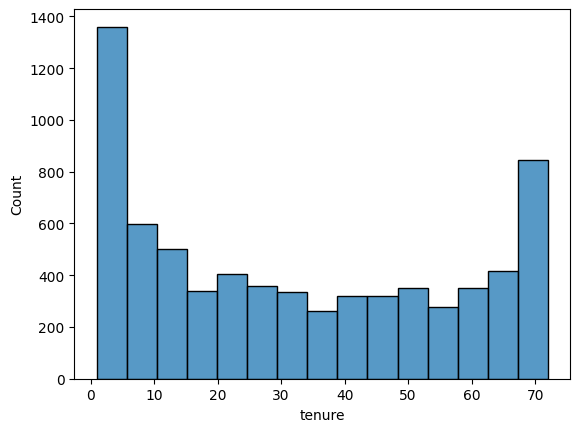

In [ ]:
sns.histplot(data=df, x="tenure")

In [ ]:
df.loc[df["tenure"]<10, "tenure_group"] = "1-10"
df.loc[(df["tenure"]>=10) & (df["tenure"]<30), "tenure_group"] = "10-30"
df.loc[(df["tenure"]>=30) & (df["tenure"]<50), "tenure_group"] = "30-50"
df.loc[df["tenure"]>=50, "tenure_group"] = "50+"

In [ ]:
df[["tenure", "tenure_group"]]

,tenure,tenure_group
customerID,,
7590-VHVEG,1,1-10
5575-GNVDE,34,30-50
3668-QPYBK,2,1-10
7795-CFOCW,45,30-50
9237-HQITU,2,1-10
...,...,...
6840-RESVB,24,10-30
2234-XADUH,72,50+
4801-JZAZL,11,10-30


<Axes: xlabel='tenure_group', ylabel='count'>

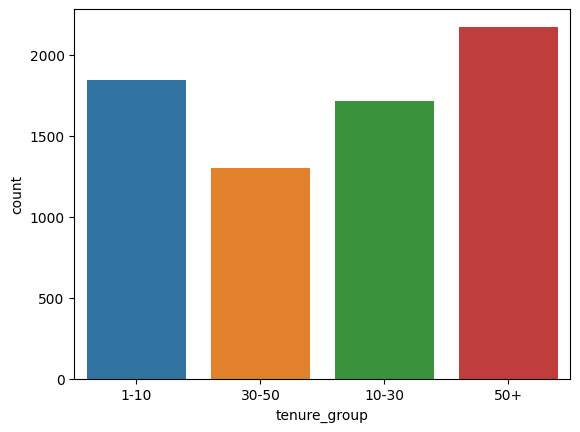

In [ ]:
colors = {"1-10": "blue", "10-30": "orange", "30-50": "green", "50+": "red"}
sns.countplot(data = df, x="tenure_group", hue="tenure_group")

In [ ]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: xlabel='TotalCharges', ylabel='Count'>

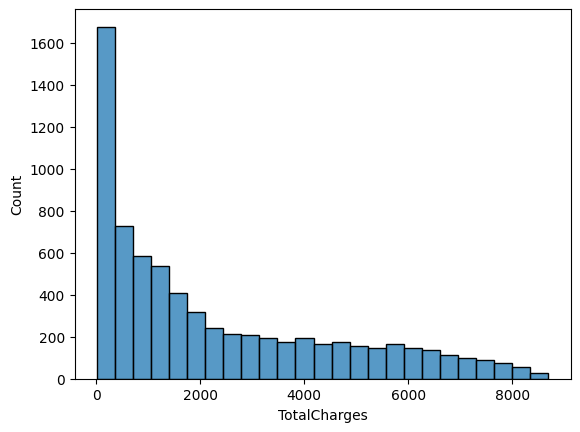

In [ ]:
sns.histplot(data=df, x="TotalCharges")

In [ ]:
df.loc[df["TotalCharges"]<400, "TotalCharges_group"] = "0-400"
df.loc[(df["TotalCharges"]>=400) & (df["TotalCharges"]<1400), "TotalCharges_group"] = "400-1400"
df.loc[(df["TotalCharges"]>=1400) & (df["TotalCharges"]<3400), "TotalCharges_group"] = "1400-3400"
df.loc[df["TotalCharges"]>=3400, "TotalCharges_group"] = "3400+"

In [ ]:
df[["TotalCharges", "TotalCharges_group"]]

,TotalCharges,TotalCharges_group
customerID,,
7590-VHVEG,29.85,0-400
5575-GNVDE,1889.50,1400-3400
3668-QPYBK,108.15,0-400
7795-CFOCW,1840.75,1400-3400
9237-HQITU,151.65,0-400
...,...,...
6840-RESVB,1990.50,1400-3400
2234-XADUH,7362.90,3400+
4801-JZAZL,346.45,0-400


<Axes: xlabel='TotalCharges_group', ylabel='count'>

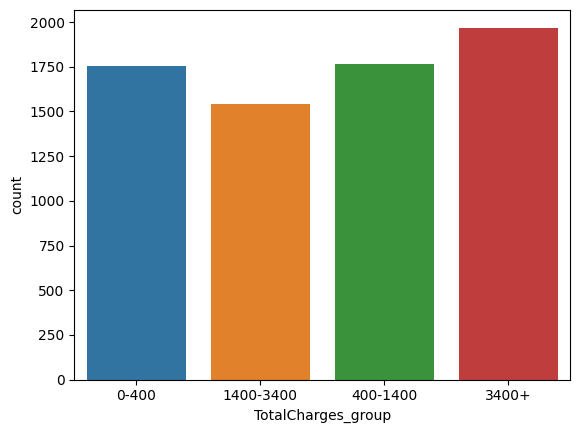

In [ ]:
colors = {"0-400": "blue", "600-1400": "orange", "1400-3400": "green", "3400+": "red"}
sns.countplot(data = df, x="TotalCharges_group", hue="TotalCharges_group")

## 미션 2) - One-Hot-Encoding 하기



In [ ]:
# 여기에 one-hot-encoding 을 구현해 주세요.
df_ohe = pd.get_dummies(df.iloc[:,df.columns != "Churn"])
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,MonthlyCharges_group_68-93,MonthlyCharges_group_93+,tenure_group_1-10,tenure_group_10-30,tenure_group_30-50,tenure_group_50+,TotalCharges_group_0-400,TotalCharges_group_1400-3400,TotalCharges_group_3400+,TotalCharges_group_400-1400
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.


In [ ]:
X = df_ohe
y = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from scipy.stats import randint, uniform
params = {"max_depth": randint(1,50),
          "min_samples_split": randint(2,25),
          "min_samples_leaf": randint(1,25)}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(), params, n_jobs = -1, n_iter=500, random_state=42)
rs.fit(X_train, y_train)
rs.best_params_

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 16}

In [ ]:
 # 여기에 모델을 구현해 주세요.
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=22, min_samples_split=16, random_state=42)

In [ ]:
# 위에서 만든 모델로 학습과 예측을 진행해 주세요.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=22, min_samples_split=16,
                       random_state=42)

In [ ]:
# 학습 결과와 원래 정답과의 Accuracy(정확도)를 구해주세요.
model.score(X_test, y_test)

0.7924662402274343